# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.





## Fonctions utiles pour les TPs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def empirical_mean(array):
    return np.mean(array)

def empirical_autocovariance(array, tau):
    n = len(array)
    mean = empirical_mean(array)
    if tau>n or tau<0:
        raise ValueError("La valeur de tau n'est pas valable")
    sum = 0
    for k in range(n-tau):
        sum += (array[k+tau]-mean)*np.conj(array[k]-mean)
    return (1/n)*sum


def compute_1(size):
    return np.random.normal(0,1,size)


def compute_2( size, a , b):
    array = compute_1(size)
    n = len(array)
    Y_0 = a + b*array[0]
    Y = [Y_0]
    for k in range(1, n):
        Y.append(a+b*array[k]+array[k-1])
    return Y


def compute_3(size, a):
    array = compute_1(size)
    Y = []
    K = 100
    for t in range(len(array)):
        sum = 0
        for k in range(0,min(len(array),K)):
            sum += (1/(2**(k)))*array[t-k]
        Y.append(sum + a)
    return Y


def compute_4(size,A, delta):
    wn = np.random.normal(0,1,size)
    phi = np.random.uniform(0,2*np.pi)
    Y = [ A*np.cos(delta*i+phi) + wn[i] for i in range(size)]
    return Y




Pour le processus de bruit blanc tel que $Z_t = \text{WN}\left(0,\sigma^2\right)$

$\mathbb{E}[Z_t] = 0$

$\gamma(h) = \sigma^2\delta_0(h)$

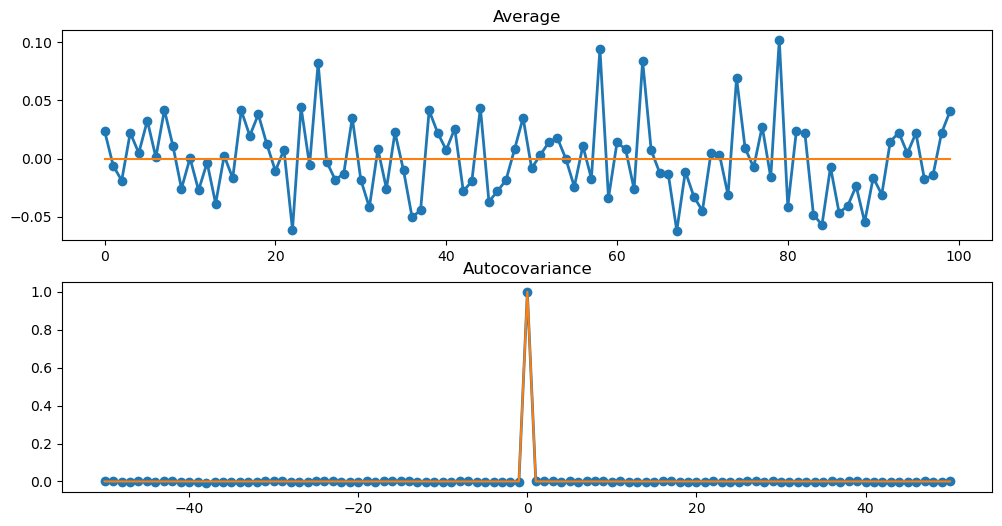

In [3]:
sample = 100
samplecov = int(sample/2)
x1 = np.arange(0,sample,1)
x2 = [i for i in range(-samplecov,samplecov+1)]

################################################################ Compute the average
average = []
for k in range(sample):
    average.append(empirical_mean(compute_1(1000)))


############################################################### Compute the function autocovariance
autocovariance = []
for k in range(-samplecov, samplecov+1):
    L = []
    for i in range(250):
        L.append(empirical_autocovariance(compute_1(1000),abs(k)))
    autocovariance.append(np.mean(L))

############################################################### Compute the theoretical average and autocovariance

avg_theoretical= [ 0 for i in range(0,sample)]
acf_theoretical = [0 for i in range(-samplecov,samplecov+1)]
acf_theoretical[sample//2] = 1

############################################################### PLOT THE RESULT

fig, ax = plt.subplots(2,1)
fig.set_size_inches(12,6)
ax[0].set_title("Average")
ax[0].plot(x1, average, linewidth=2.0)
ax[0].scatter(x1, average)

ax[0].plot(x1, avg_theoretical, linewidth=1.5)


ax[1].set_title("Autocovariance")
ax[1].plot(x2, autocovariance, linewidth=2.0)
ax[1].scatter(x2, autocovariance)

ax[1].plot(x2, acf_theoretical, linewidth=1.5)
plt.show()

Pour -  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$

$\mathbb{E}[X_t] = a + b\mathbb{E}[E_t] + \mathbb{E}[Z_{t-1}] = a$

$\gamma(h) = Cov(a+bZ_t+Z_{t-1}, a+bZ_{t-h}+Z_{t-h-1}) = b^2Cov(Z_t,Z_{t-h-1}) + bCov(Z_t, Z_{t-h-1}) + bCov(Z_{t-1},Z_{t-h}) + Cov(Z_{t-1}, Z_{t-h-1})$

$\gamma(h) = (b\sigma)^2\delta_0(h) + b\sigma^2(\delta_{-1}(h)+ \delta{1}(h)) + \sigma^2\delta_0(h) = \sigma^2(b^2+1)\delta_0(h) + b\sigma^2(\delta_{-1}(h)+ \delta{1}(h))$



On prend $a=2$ et $b=1$ et la $\sigma^2 = 1$

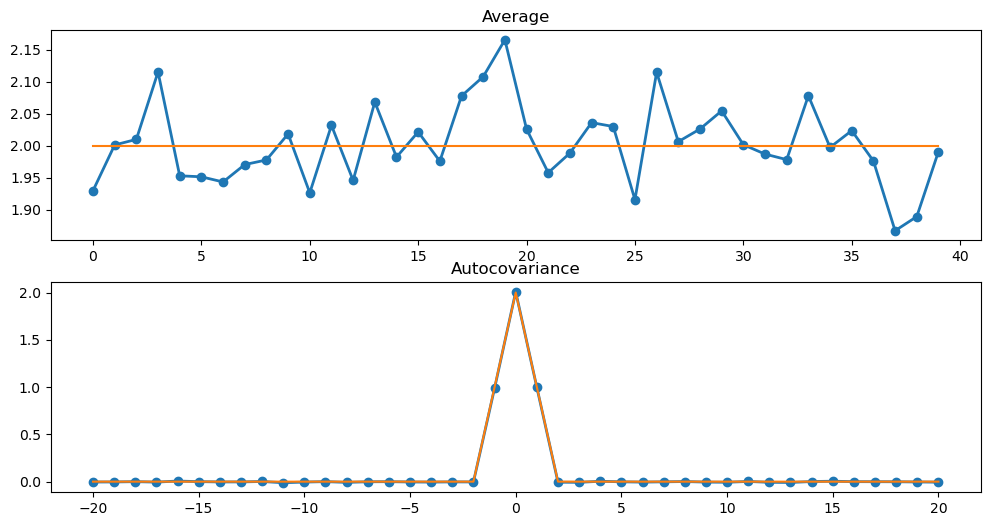

In [13]:
sample = 40
samplecov = int(sample/2)
x1 = np.arange(0,40,1)
x2 = [i for i in range(-samplecov,samplecov+1)]
############################################################## Compute the empirical average and autocovariance

average = []
autocovariance = []
for k in range(sample):
    average.append(empirical_mean(compute_2(1000,2,1)))

############################################################## Compute the theoretical average and autocovariance

avg_theoretical= [ 2 for i in range(0,sample)]
acf_theoretical = [0 for i in range(-samplecov,samplecov+1)]
acf_theoretical[sample//2] = 2
acf_theoretical[sample//2-1] = 1
acf_theoretical[sample//2+1] = 1

############################################################## Plot the result

fig, ax = plt.subplots(2,1)
fig.set_size_inches(12,6)
ax[0].set_title("Average")
ax[0].plot(x1, average, linewidth=2.0)
ax[0].scatter(x1, average)
ax[0].plot(x1, avg_theoretical, linewidth=1.5)

for k in range(-samplecov, samplecov+1):
    L = []
    for i in range(250):
        L.append(empirical_autocovariance(compute_2(1000,2,1),abs(k)))
    autocovariance.append(np.mean(L))

ax[1].set_title("Autocovariance")
ax[1].plot(x2, autocovariance, linewidth=2.0)
ax[1].scatter(x2, autocovariance)
ax[1].plot(x2, acf_theoretical, linewidth=1.5)
plt.show()

Pour le processus : $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")

$\mathbb{E}[X_t] = \sum_{k=0}^{K}2^{-k}\mathbb{E}[Z_{t-k}] + a = a$ par linéarité

$\gamma(h) = Cov(\sum_{k=0}^{K}2^{-k}Z_{t-k}, \sum_{i=0}^{K}2^{-i}Z_{t+h-i}) = \sum_{k=0}^{K}\sum_{i=0}^{K}2^{-(k+i)}Cov(Z_{t-k}, Z_{t+h-k})$

$\gamma(h) = \sigma^2 \sum_{k=0}^{K}\sum_{i=0}^{K}2^{-(k+i)}\delta_{t-k,t+h-i}$

$\gamma(h) = \sigma^2 \sum{k=0}^{K}2^{-(2*k+h)}÷\delta_{k,i-h}$ avec nécessairement $\delta_{k,i-h} ≠ 0$ d'où $i = k+h,   h  \leq K$

$\gamma(h) = \sigma^2 * 2^{-h} \sum{k=0}^{K} 4^{-k}$

$\gamma(h) = \sigma^2 * 2^{-h} * \frac{1-4^{-K+1}}{1-\frac{1}{4}}$

$\gamma(h) = \frac{4}{3} *\sigma^2 *\frac{1}{2^h}*(1-\frac{1}{4^{K+1}})$

Ainsi, pour K grand, on a : 

$\gamma(h) = \frac{4}{3} *\sigma^2 *\frac{1}{2^h} $ pour $h \leq K$, 0 sinon

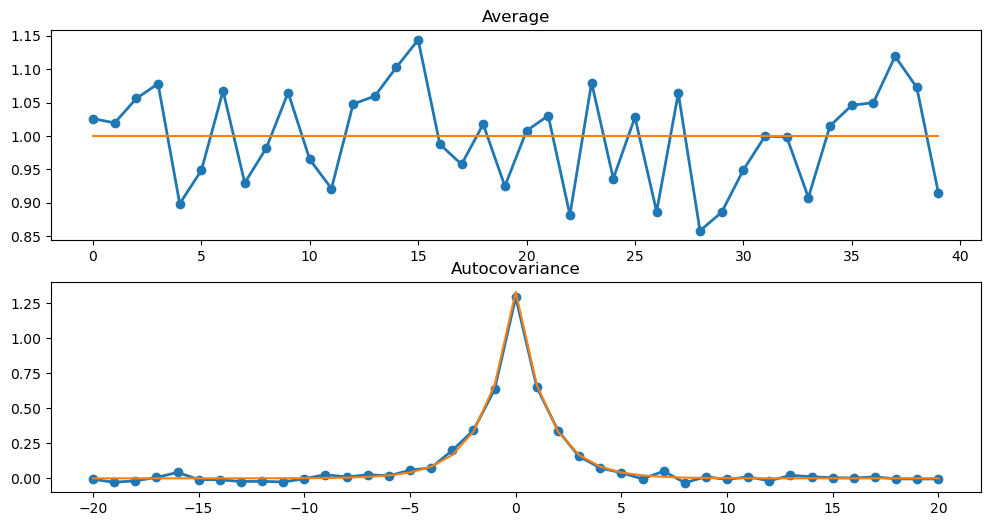

In [14]:
sample = 40
samplecov = int(sample/2)
x1 = np.arange(0,40,1)
x2 = [i for i in range(-samplecov,samplecov+1)]

############################################################## Compute the empirical average and autocovariance

average = []
autocovariance = []
for k in range(sample):
    average.append(empirical_mean(compute_3(1000,1)))

for k in range(-samplecov, samplecov+1):
    L = []
    for i in range(10):
        L.append(empirical_autocovariance(compute_3(1000,1),abs(k)))
    autocovariance.append(np.mean(L))

########################################################### Compute the theoretical average and autocovariance

avg_theoretical= [ 1 for i in range(0,sample)]
acf_theoretical = [4/3*1/(2**(np.abs(-i))) for i in range(-samplecov,samplecov+1)]

############################################################# Plot the results

fig, ax = plt.subplots(2,1)
fig.set_size_inches(12,6)
ax[0].set_title("Average")
ax[0].plot(x1, average, linewidth=2.0)
ax[0].scatter(x1, average)
ax[0].plot(x1, avg_theoretical, linewidth=1.5)



ax[1].set_title("Autocovariance")
ax[1].plot(x2, autocovariance, linewidth=2.0)
ax[1].scatter(x2, autocovariance)
ax[1].plot(x2, acf_theoretical, linewidth=1.5)

plt.show()

Pour le processus $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$

$\mathbb{E}[X_t] = A_0 \mathbb{E}[\cos(\lambda_0t+\Phi_0)] + \mathbb{E}[Z_t] = A_0*0 + 0 $ car la moyenne d'un cosinus est nulle.

$\gamma(h) = Cov(A_0\cos(\lambda_0t+\Phi_0)+Z_t, A_0\cos(\lambda_0(t+h)+\Phi_0)+Z_{t+h})$ 

On calcule d'abord $Cov(A_0\cos(\lambda_0t+\Phi_0)+Z_t, Z_{t+h}) = Cov(A_0\cos(\lambda_0t+\Phi_0), Z_{t+h}) + Cov(Z_t, Z_{t+h})$

Or $Z_t$ est indépendant de $\cos(\lambda_0t+\Phi_0)$, donc $Cov(A_0\cos(\lambda_0t+\Phi_0)+Z_t, Z_{t+h}) = \sigma^2\delta_{h=0}$

De plus, 

$Cov(A_0\cos(\lambda_0t+\Phi_0),A_0\cos(\lambda_0(t+h)+\Phi_0)) = A_0^2\mathbb{E}[\cos(\lambda_0t+\Phi_0)*\cos(\lambda_0(t+h)+\Phi_0)]$

$Cov(A_0\cos(\lambda_0t+\Phi_0),A_0\cos(\lambda_0(t+h)+\Phi_0)) = A_0^2\mathbb{E}[\frac{1}{2}(\cos(\lambda_0t+\Phi_0 + \lambda_0(t+h)\Phi_0)+\cos(\lambda_0h)]$

$Cov(A_0\cos(\lambda_0t+\Phi_0),A_0\cos(\lambda_0(t+h)+\Phi_0)) = A_0^2\mathbb{E}[\frac{1}{2}(\cos(2(\lambda_0t+\Phi_0) + \lambda_0h)+\cos(\lambda_0h))]$

$Cov(A_0\cos(\lambda_0t+\Phi_0),A_0\cos(\lambda_0(t+h)+\Phi_0)) = \frac{A_0^2}{2}*\cos(\lambda_0h) + A_0^2*\mathbb{E}[\frac{1}{2}(\cos{(2\lambda_0t + \lambda_0h) + 2\Phi_0})] $

Ainsi, $\gamma(h) = \sigma^2\delta_0(h) + \frac{A_0^2}{2}*\cos(\lambda_0h)$

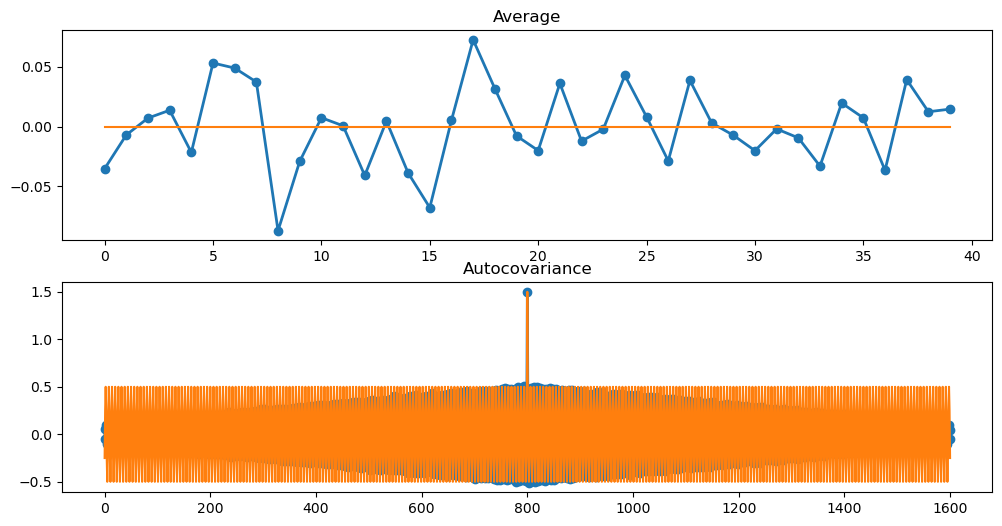

In [20]:
sample = 40
samplecov = int(sample/2)
x1 = np.arange(0,40,1)
x2 = np.arange(0,1601,1)

############################################### Compute the empirical average and autocovariance

average = []
autocovariance = []
for k in range(sample):
    average.append(empirical_mean(compute_4(1000,1,np.pi/3)))

for k in range(-800, 800+1):
    L = []
    for i in range(20):
        L.append(empirical_autocovariance(compute_4(1000,1,np.pi/3),abs(k)))
    autocovariance.append(np.mean(L))



################################################# Compute the theoretical average and autocovariance

avg_theoretical= [ 0 for i in range(0,sample)]
acf_theoretical = [ (1/2)*np.cos((np.pi/3)*i) for i in range(-800,800+1)]
acf_theoretical[1600//2] = acf_theoretical[1600//2]+1


################################################# Plot the results
fig, ax = plt.subplots(2,1)
fig.set_size_inches(12,6)
ax[0].set_title("Average")
ax[0].plot(x1, average, linewidth=2.0)
ax[0].scatter(x1, average)
ax[0].plot(x1, avg_theoretical, linewidth=1.5)



ax[1].set_title("Autocovariance")
ax[1].plot(x2, autocovariance, linewidth=2.0)
ax[1].scatter(x2, autocovariance)
ax[1].plot(x2, acf_theoretical, linewidth=1.5)
plt.show()

on voit que l'autocovariance empirique décroit avec $h$, cela est dû au facteur $\frac{1}{n}$ dans l'autocovariance empirique car quand h est du même ordre de grandeur que $n$, l'autocovariance va tendre vers 0. (effet non observé prcédemment car on travaillait sur des variances nulles rapidement.)

Text(0.5, 0, '[10, 100, 500, 1000]')

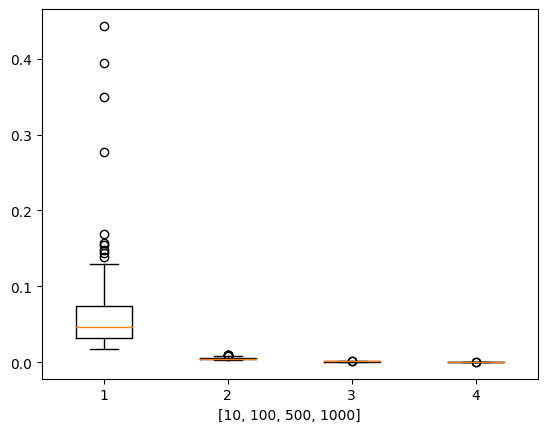

In [47]:
T = [10,100,500,1000]
L_WN = []

for k in T:
    L_MSE = []
    acf_theoretical = np.zeros(k)
    acf_theoretical[0] = 1
    for i in range(100): 
        autocovariance = []
        X_WN = compute_1(k)
        for j in range(0, k):
            autocovariance.append(empirical_autocovariance(X_WN,j))
        L_MSE.append( (1/k)*np.sum((autocovariance-acf_theoretical)**2))
    L_WN.append(L_MSE)

# Créez le boxplot
fig, ax = plt.subplots()
ax.boxplot(L_WN)

# Modifiez les labels
ax.set_xlabel("Longueur de l'échantillon")
ax.set_ylabel("MSE")
ax.set_xticks([y + 1 for y in range(len(L_WN))],labels=['10', '100', '500', '1000'])

# Affichez le graphique
plt.show()

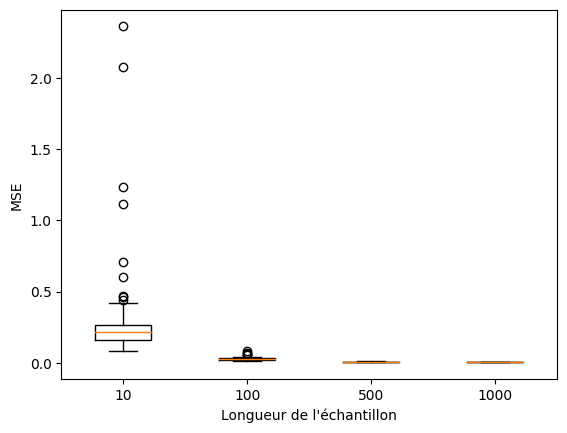

In [62]:
T = [10,100,500,1000]
L_MA = []

for k in T:
    L_MSE = []
    acf_theoretical = np.zeros(k)
    acf_theoretical[0] = 2
    acf_theoretical[1] = 1
    for i in range(100): 
        autocovariance = []
        X_MA = compute_2(k,2,1)
        for j in range(0, k):
            autocovariance.append(empirical_autocovariance(X_MA,j))
        L_MSE.append( (1/k)*np.sum((autocovariance-acf_theoretical)**2))
    L_MA.append(L_MSE)

# Créez le boxplot
fig, ax = plt.subplots()
ax.boxplot(L_MA)

# Modifiez les labels
ax.set_xlabel("Longueur de l'échantillon")
ax.set_ylabel("MSE")
ax.set_xticks([y + 1 for y in range(len(L_MA))],labels=['10', '100', '500', '1000'])

# Affichez le graphique
plt.show()

[1.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.16666666666666666, 0.08333333333333333, 0.041666666666666664, 0.020833333333333332, 0.010416666666666666, 0.005208333333333333, 0.0026041666666666665]
[1.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.16666666666666666, 0.08333333333333333, 0.041666666666666664, 0.020833333333333332, 0.010416666666666666, 0.005208333333333333, 0.0026041666666666665, 0.0013020833333333333, 0.0006510416666666666, 0.0003255208333333333, 0.00016276041666666666, 8.138020833333333e-05, 4.0690104166666664e-05, 2.0345052083333332e-05, 1.0172526041666666e-05, 5.086263020833333e-06, 2.5431315104166665e-06, 1.2715657552083333e-06, 6.357828776041666e-07, 3.178914388020833e-07, 1.5894571940104166e-07, 7.947285970052083e-08, 3.9736429850260414e-08, 1.9868214925130207e-08, 9.934107462565104e-09, 4.967053731282552e-09, 2.483526865641276e-09, 1.241763432820638e-09, 6.20881716410319e-10, 3.104408582051595e-10, 1.5522042910257974e-10, 7.761021455

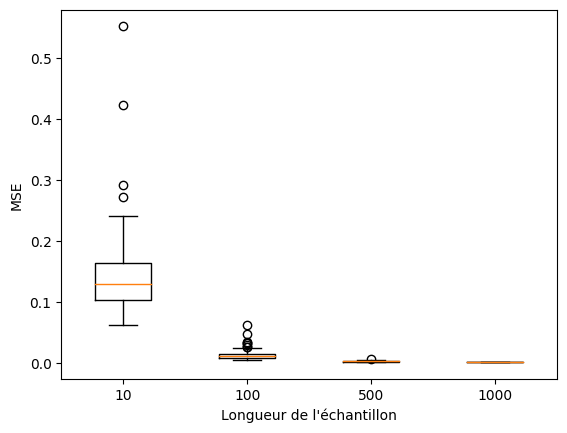

In [13]:
T = [10,100,500,1000]
L_AR = []

for k in T:
    L_MSE = []
    if k <= 100:   
        acf_theoretical = [(4/3)*(1/(2**(i))) for i in range(0,k)]
    if k>100:
         acf_theoretical = [(4/3)*(1/(2**(i))) for i in range(0,100)]
         acf_theoretical = np.concatenate([acf_theoretical, np.zeros(k-100)])
    print(acf_theoretical)
    for i in range(100): 
        autocovariance = []
        X_AR = compute_3(k,1)
        for j in range(0, k):
                autocovariance.append(empirical_autocovariance(X_AR,j))
        autocovariance = np.array(autocovariance)
        acf_theoretical = np.array(acf_theoretical)
        L_MSE.append( (1/k)*np.sum((autocovariance-acf_theoretical)**2))
    L_AR.append(L_MSE)

# Créez le boxplot
print(L_AR)
fig, ax = plt.subplots()
ax.boxplot(L_AR)

# Modifiez les labels
ax.set_xlabel("Longueur de l'échantillon")
ax.set_ylabel("MSE")
ax.set_xticks([y + 1 for y in range(len(L_AR))],labels=['10', '100', '500', '1000'])

# Affichez le graphique
plt.show()

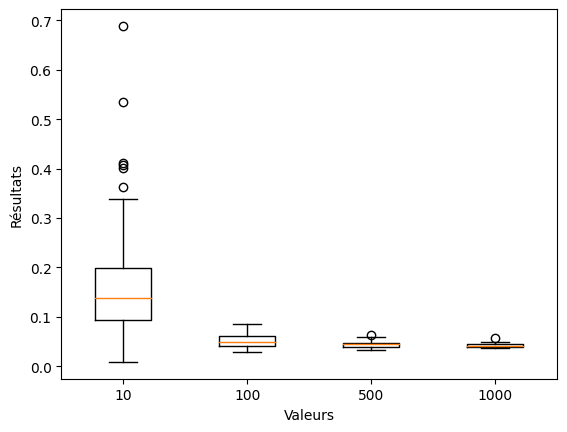

In [60]:
T = [10,100,500,1000]
L_HP = []

for k in T:
    L_MSE = []
    acf_theoretical = [ (1/2)*np.cos((np.pi/3)*i) for i in range(0,k)]
    acf_theoretical[0] = acf_theoretical[0]+1
    for i in range(100): 
        autocovariance = []
        X_HP = compute_4(k,1,np.pi/3)
        for j in range(0, k):
                autocovariance.append(empirical_autocovariance(X_HP,j))
        autocovariance = np.array(autocovariance)
        acf_theoretical = np.array(acf_theoretical)
        L_MSE.append( (1/k)*np.sum((autocovariance-acf_theoretical)**2))
    L_HP.append(L_MSE)

# Créez le boxplot
fig, ax = plt.subplots()
ax.boxplot(L_HP)

# Modifiez les labels
ax.set_xlabel("Longueur de l'échantillon")
ax.set_ylabel("MSE")
ax.set_xticks([y + 1 for y in range(len(L_HP))],labels=['10', '100', '500', '1000'])

# Affichez le graphique
plt.show()

# TSIA202a - Second Practice Session : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$
2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session
3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$ Try this estimator on the autocovariance of previous time series of the first session.

5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.




#### Question 1

On a : $I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2$ donc :

$ I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |\sum_{k=0}^{n-1} X_k e^{i\lambda \frac{2 \pi k}{m}}|^2 = \frac{1}{2\pi n} |\sum_{k=0}^{n-1} \overline{X_k} \overline{e^{-i\lambda \frac{2 \pi k}{m}}}|^2$ car $X_k$ est réel

$ I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |\overline{\sum_{k=0}^{n-1} X_k e^{-i\lambda \frac{2 \pi k}{m}}}|^2 = \frac{1}{2\pi n} |\sum_{k=0}^{n-1} X_k e^{-i\lambda \frac{2 \pi k}{m}}|^2 = \frac{1}{2\pi n} |DFT(X,m)(k)|^2 $

Cela conclut la démonstration pour la question 1.

#### Question 2

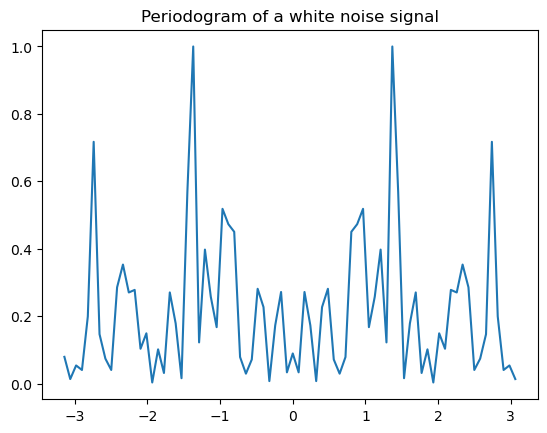

In [2]:
############### Question 2 #################
import numpy as np

def I_n(X,m):
    return (1/(len(X)*2*np.pi))* np.abs(np.fft.fft(X,n = m))**2

H   = 20      # number of points for covariance
n   = 2*H -1  # number of process' samples
tc     = np.arange(-(H-1),H)  # temporal axis for ACF

# Generate a white noise
X = np.random.normal(0,1,n) # White noise
m = 2*n
I = I_n(X,m)
I = I / np.max(I)

fig, ax = plt.subplots()
ax.plot(np.arange(-m//2, m//2)*2*np.pi/I.size, I)
plt.title('Periodogram of a white noise signal')

plt.show()

#### Question 3

Le théorème d'Hertglotz fournit une relation entre l'autocovariance empirique et le périodogramme :
$\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda$

Posons la fonction défini sur $\mathbb{T}$, $f(\lambda) = \frac{1}{2\pi}\sum_{h \in \mathbb{Z}} \gamma(h)e^{-ih\lambda}$ 

On voit assez rapidement que $\lambda \xrightarrow{} f(\lambda)$ est continue et $(2\pi)$-périodique

De plus, grâce à la périodicité, on montre que $\hat\gamma_n(k) = \int_{\mathbb{T}}e^{ik\lambda}f(\lambda)d\lambda$

Ainsi, par unicité de la mesure, on obtient le résultat voulu :

$I_n({\lambda}) = \frac{1}{2\pi}\sum_{k = 0}^{n-1} \hat\gamma_n(k)e^{-ik\lambda}$

#### Question 4

Pour $m = n$, on peut avoir un lien facile entre $I_n(\frac{2k\pi}{m})$ et $\hat\gamma_n(k)$ : en effet, on a : 

$\hat\gamma_n(k) = \frac{2\pi}{n}\sum_{k=0}^{n-1} I_n(\frac{2k\pi}{n})e^{\frac{2\pi i n k}{n}}$   d'où :  

$\hat\gamma_n(k) = \frac{2\pi}{n}\sum_{k=0}^{n-1} \frac{1}{2\pi n} |DFT(X,n)(k)|^2 e^{\frac{2\pi i n k}{n}}$

$\hat\gamma_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, n)\right|^2, n\right)(k)$

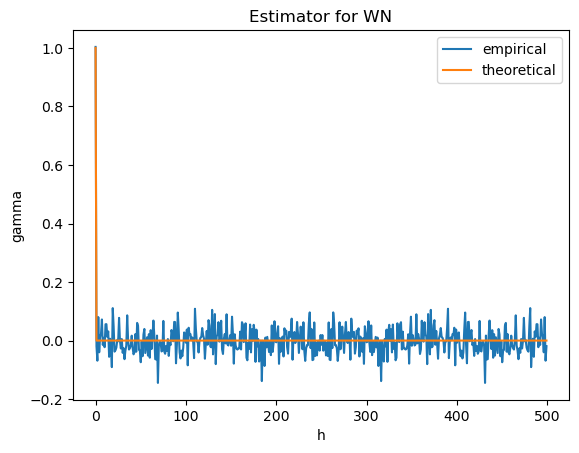

In [3]:
def estimatorcov(X):

    I = np.abs(np.fft.fft(X,len(X))) ** 2 /  len(X)
    gamma = np.real(np.fft.ifft(I))    
    gamma = gamma[0:len(X)]
    return gamma

n = 500

X = np.random.normal(0,1,n)
X = X - np.mean(X)
gamma_empirical = estimatorcov(X)
gamma_theoretical = np.zeros(n)
gamma_theoretical[0] = 1
fig, ax = plt.subplots()
plt.title("Estimator for WN")
ax.plot(gamma_empirical, label = 'empirical')
ax.plot(gamma_theoretical, label = 'theoretical')
plt.xlabel("h")
plt.ylabel("gamma")
plt.legend()
plt.show()

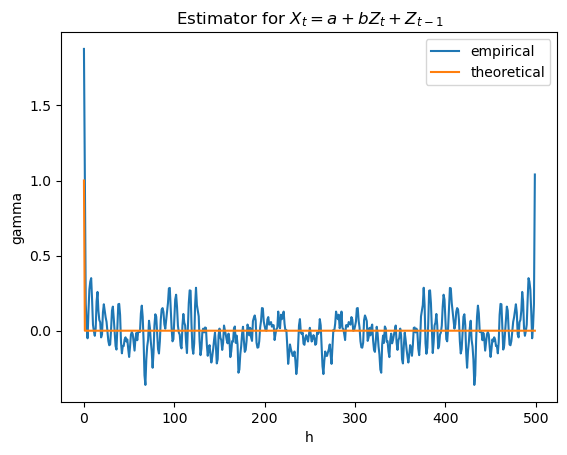

In [4]:
n = 500

X = compute_2(n,2,1)
X = X - np.mean(X)
gamma_empirical = estimatorcov(X)
gamma_theoretical = np.zeros(n)
gamma_theoretical[0] = 1
fig, ax = plt.subplots()

ax.plot(gamma_empirical, label = 'empirical')
ax.plot(gamma_theoretical, label = 'theoretical')
plt.title("Estimator for $X_t = a+bZ_t+Z_{t-1}$")
plt.xlabel("h")
plt.ylabel("gamma")
plt.legend()
plt.show()

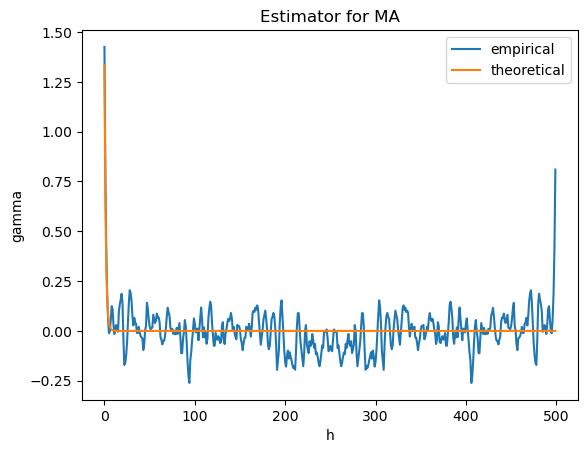

In [5]:
n = 500

X = compute_3(n,1)
X = X - np.mean(X)
gamma_empirical = estimatorcov(X)
gamma_theoretical = np.concatenate([[4/3*1/(2**(np.abs(-i))) for i in range(20)], np.zeros(n-20)])
fig, ax = plt.subplots()

ax.plot(gamma_empirical, label = 'empirical')
ax.plot(gamma_theoretical, label = 'theoretical')
plt.title("Estimator for MA")
plt.xlabel("h")
plt.ylabel("gamma")
plt.legend()
plt.show()

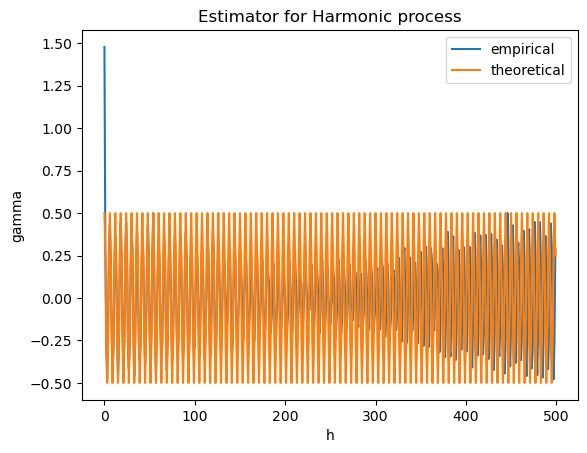

In [6]:
n = 500

X = compute_4(n,1,np.pi/3)
X = X - np.mean(X)
gamma_empirical = estimatorcov(X)
gamma_theoretical =[ (1/2)*np.cos((np.pi/3)*i) for i in range(n)]

fig, ax = plt.subplots()

ax.plot(gamma_empirical, label = 'empirical')
ax.plot(gamma_theoretical, label = 'theoretical')
plt.title("Estimator for Harmonic process")
plt.xlabel("h")
plt.ylabel("gamma")
plt.legend()
plt.show()

#### Question 5

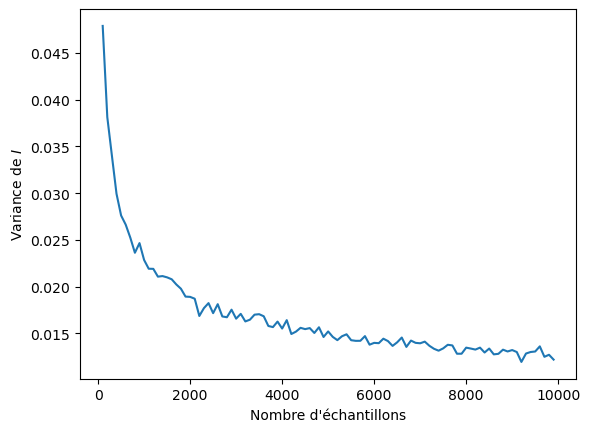

In [9]:
variance = []
x1 = np.arange(100,10000,100)

for nombre in x1:
    varmean = []
    for i in range(100):
        X = np.random.normal(0,1,nombre)
        X = X-np.mean(X)
        I = np.abs(np.fft.fft(X,len(X))) ** 2 /  len(X)
        I = I / np.max(I)
        varmean.append(I.var())

    variance.append(np.mean(varmean))

fig, ax = plt.subplots()

ax.plot(x1, variance)
plt.xlabel("Nombre d'échantillons")
plt.ylabel("Variance de $I$")
plt.show()